## This is just for me to play with the data before starting the assignment

### 1. Setting up the project
Necessary imports and loading the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL.ImImagePlugin import split

plt.style.use('ggplot')

In [37]:
# Loading the dataset 
df = pd.read_csv('data/billionaires_statistics_dataset.csv')

In [5]:
df.shape

(2640, 35)

### 2. Data cleaning
So, our data has approx. 2.5k rows and 35 columns. Let's see how well they are filled with data.

In [6]:
df.isna().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

Age/birthday related columns, country and city columns have some NaN values. We could delete the rows with them or fill them with some average values, but in case of country and city this does not make sense, so we will just keep in mind that we have to work around them.

On the other hand, organization, title, state and residenceStateRegion are almost all null values, so I will just drop those columns as they don't bring any useful information to us.

There are many columns with some values missing and I will just assume that the rows they are missing from are not scattered round but a one or two groups of rows, as the number of missing values is ~180 in one group and ~160 in another.

In [7]:
df.drop(['title', 'state', 'residenceStateRegion', 'organization'], axis=1, inplace=True)

Let's also check for duplicates:

In [8]:
df.loc[df.duplicated()]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country


There is no duplicates in our table.

In [9]:
df.shape

(2640, 31)

In [10]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [11]:
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
date                                           object
birthYear                                     float64
birthMonth                  

In the table above we can see 31 features, mostly categorical but there are a plenty of numerical ones too.

I will change the gpd_country and gender columns respectively from M and F to 0 and 1 and from dollars to integers, to be able to use it later along with numerical columns:

In [12]:
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['gdp_country'] = df['gdp_country'].replace('[$,]', '', regex=True).astype(float)

                                                                                                                                                                                                                                            
### 3. Data analysis

Now that we've prepared our data, we can finally work with it.

First, I want to just get a better grasp of data - let's about where the billionaires are from, what's their gender ratio and other simple facts.

In [13]:
len(df['country'].unique()) # How many countries are the billionaires from?

79

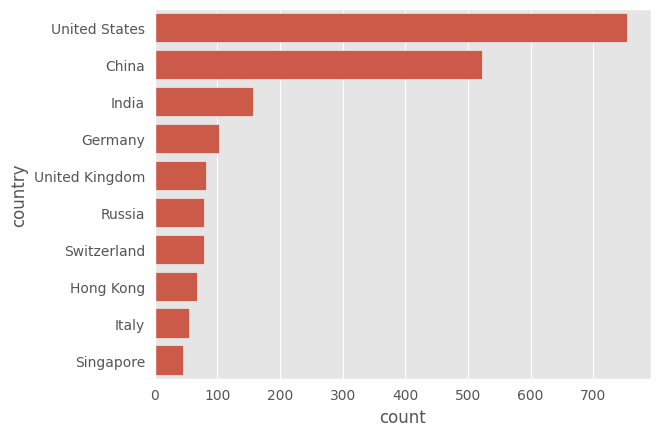

In [14]:
sorted_countries = df['country'].value_counts().sort_values(ascending=False).nlargest(10).index
sns.countplot(df['country'], order=sorted_countries)
plt.show()

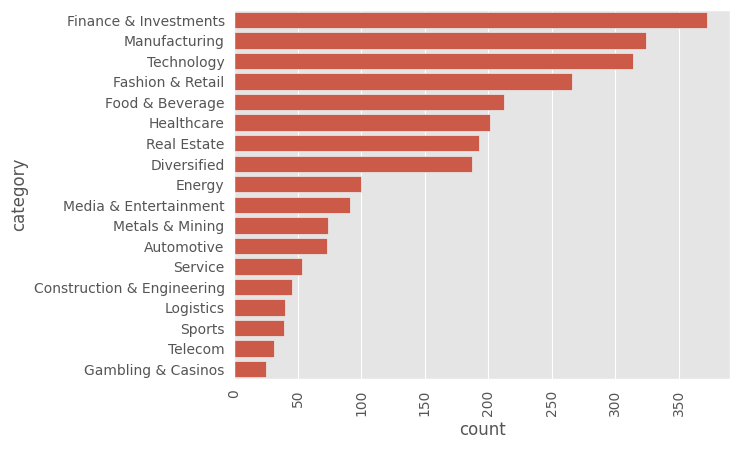

In [15]:
sns.countplot(df['category'], order=df['category'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

In [16]:
m, f = df['gender'].value_counts()
print(f"{f / (f + m) * 100: .2f}% of billionaires are women.")
print(f"{m / (f + m) * 100: .2f}% of billionaires are men.")

 12.77% of billionaires are women.
 87.23% of billionaires are men.


<Axes: >

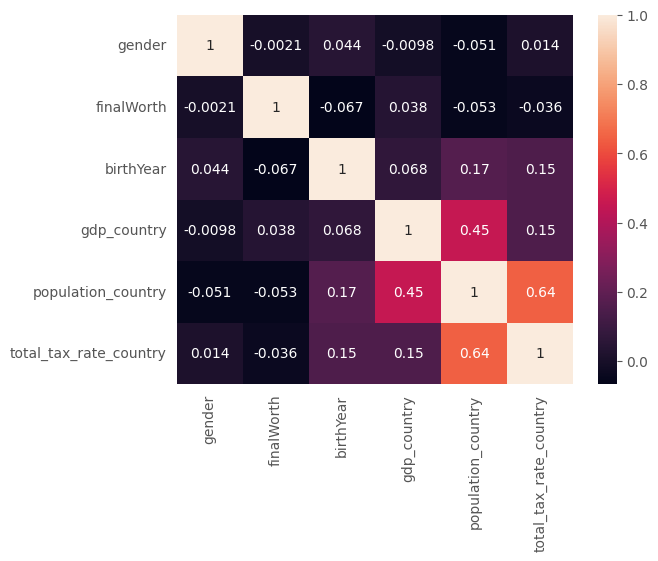

In [17]:
sns.heatmap(df[['gender', 'finalWorth', 'birthYear', 'gdp_country', 'population_country', 'total_tax_rate_country']].corr(), annot=True)

I wanted to see what variables are correlated to finalWorth and well, not much of them. I bet the country is of some significance in this case.

In [18]:
df.groupby('country')['finalWorth'].agg(['mean', 'count']).query('count > 20').sort_values(by='mean', ascending=False)

,mean,count
country,,
France,14271.428571,35
United States,6067.771883,754
Spain,5348.000000,25
Switzerland,5255.128205,78
Indonesia,4956.000000,25
Hong Kong,4727.941176,68
Germany,4530.392157,102
United Kingdom,4520.731707,82
Russia,4443.037975,79


In [19]:
df.groupby('country')['finalWorth'].agg(['mean', 'count']).query('country == "Poland"').sort_values(by='mean', ascending=False)


,mean,count
country,,
Poland,3660.0,5


In [20]:
df.groupby('gender')['finalWorth'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
# Here we can se that gender has no correlation to networth if you're already a billionaire - women are either distributed linearly throughout the billionaire list or in some kind of clusters, but I do not see any reason for the latter to happen

,mean,count
gender,,
0,4631.610942,2303
1,4570.326409,337


In [21]:
numerical_series = ['rank', 'finalWorth', 'age', 'gdp_country', 'birthYear', 'cpi_country', 'cpi_change_country',
                    'gross_primary_education_enrollment_country', 'gross_tertiary_education_enrollment',
                    'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country',
                    'population_country', 'latitude_country', 'longitude_country']

categorical_series = ['category', 'personName', 'country', 'city', 'source', 'industries', 'industries', 'countryOfCitizenship',
                     'selfMade', 'status', 'gender', 'lastName', 'firstName']


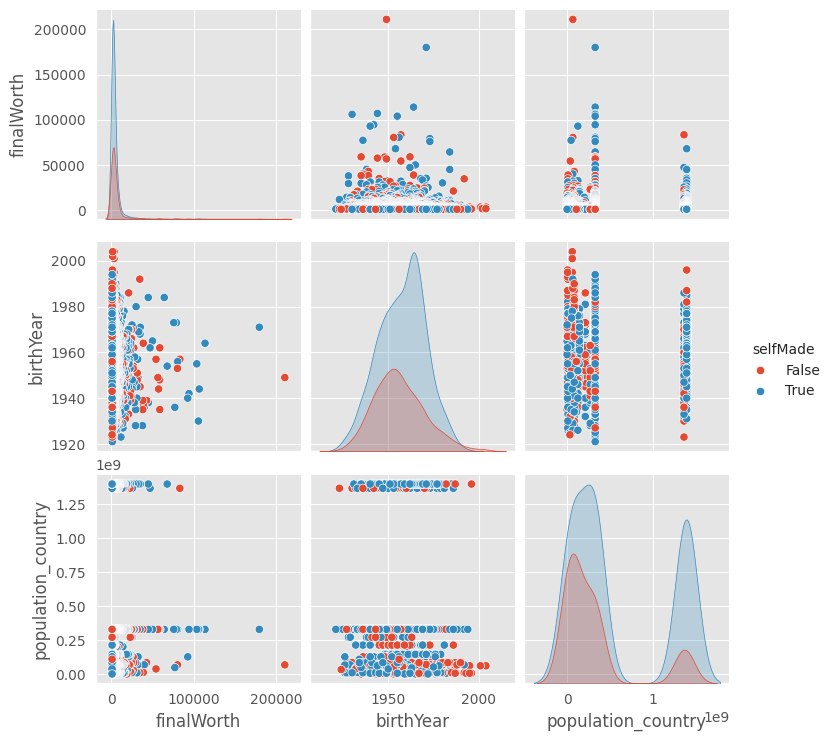

In [30]:
sns.pairplot(df[['selfMade', 'finalWorth', 'birthYear', 'population_country']], hue='selfMade')

<Axes: xlabel='gender', ylabel='birthYear'>

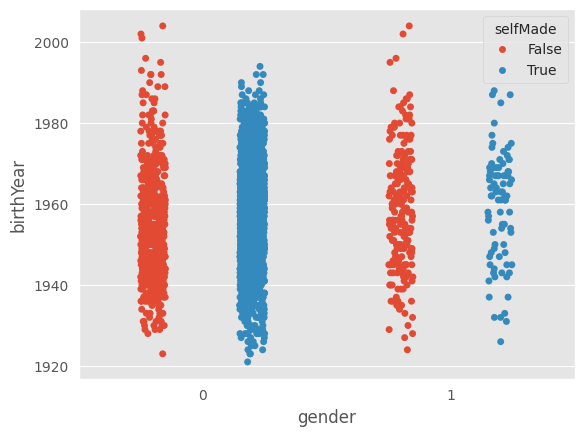

In [36]:
sns.stripplot(x='gender', y='birthYear', data=df, jitter=True, hue='selfMade    ', dodge=True)